# Pymaceuticals Inc.
---

### Analysis

-The test data has been merged together, cleaned and Summarized for information resulting in bar charts, pie charts, the box plots, the line graph, scatter plot, and the correlation/regression plots.. • Based upon the statistical summary information, Capomulin and Ramicane had the greatest impact on reducing tumor volume • The bar charts showed the greatest number of tests executed on both Capomulin and Ramicane. 

The pie charts showed the distribution of male to female was about even within 1% of difference.
The Quartiles, Outliers and Boxplots showed Capomulin and Ramicane impact on reducing tumor volume. Based upon the quartiles, it appears that Ramicane may have slightly better results because the upper quartile was slightly lower
The line plot for mouse l1509 using Capomulin treatment showed the tumor continued to grow until about day 20, then the tumor reduced in sized for the next few days days, and then started to grow again. I would appear the observations were stopped after about 45 days. 
The scatter plot combined with Linear regression showed a positive correlation between mouse weight and average volume of Tumor. It could be concluded that larger mice have larger tumors 

Conclusions:

Capomulin :
It is the most popular drug regimen among the mice tested
The weight of the mouse seemed to impact the volume of tumor. Tumor volume increased with average weight of mice.

Ramicane:
This might be slightly better than Capomulin based upon the box plot. It could be the most succesful drug treatment in reducing tumor size


 

In [ ]:
# Importing required libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how = 'left', on = 'Mouse ID')

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
# Checking the number of mice.
mice_count = combined_df['Mouse ID'].nunique()
print(f"Number of unique mice in the test: {mice_count}")

Number of unique mice in the test: 249


In [40]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_df.loc[combined_df.duplicated(subset = ["Mouse ID", "Timepoint"]), 'Mouse ID'].unique()
# duplicate_mice
print(f"Duplicate Mouse IDs at the same timepoints: {duplicate_mice}")

Duplicate Mouse IDs at the same timepoints: ['g989']


In [5]:
# Get all the data for the duplicate mouse ID.
duplicate_data = combined_df.loc[combined_df['Mouse ID'] == duplicate_mice[0]]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = combined_df.drop_duplicates(keep = 'first')
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [44]:
# Checking the number of mice in the clean DataFrame. and total lenght of rows

print(f"Total number of mouse data: {len(mouse_df)}")
print(f" Unique Mouse_ID: {(mouse_df['Mouse ID'].nunique())}")

Total number of mouse data: 1892
 Unique Mouse_ID: 249


## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Tumorvol_mean = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
Tumorvol_median = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
Tumorvol_var = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
Tumorvol_stddev = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
Tumorvol_sem = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
Statistics_summary = pd.DataFrame({'Mean of Tumor Volume': Tumorvol_mean, 
                                   'Median of Tumor Volume': Tumorvol_median, 
                                   "Variance of Tumor Volume": Tumorvol_var, 
                                   'Std Dev of Tumor Volume': Tumorvol_stddev, 
                                   'SEM of Tumor Volume':  Tumorvol_sem})
Statistics_summary

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Std Dev of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# Using the aggregation method, produce the same summary statistics in a single line
Tumor_Agg_summary = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(["mean", "median", "var", "std", "sem"])

#Renaming the columns for better visual undersatnding
Tumor_Agg_summary = Tumor_Agg_summary.rename(columns={"mean": "Mean Tumor Volume",
                                                  "median": "Median Tumor Volume",
                                                   "var": "Variance Tumor Volume",
                                                   "std":"Standard Dev Tumor Volume ", 
                                                   "sem":"SEM Tumor Volume"})

Tumor_Agg_summary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Dev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

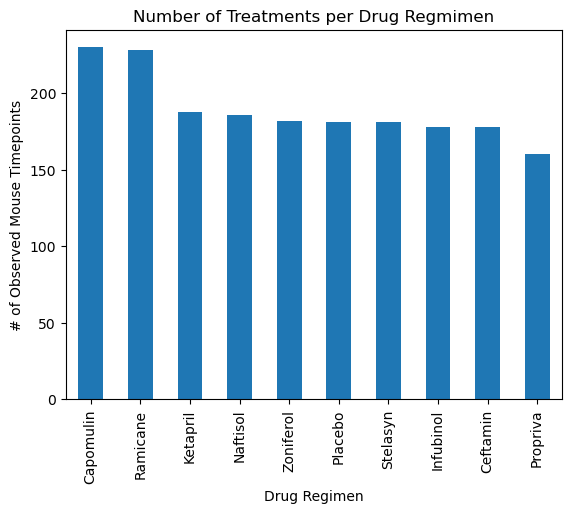

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# drug_plot = mouse_df.groupby(['Drug Regimen'])['Timepoint'].count()
# plt.title('Number of Treatments per Drug Regmimen')
# plt.xlabel("Drug Regimen")
# plt.ylabel('# of Observed Mouse Timepoints')
# drug_plot.plot(kind = 'bar', color = 'b' )

# researched the below code from google documetnation
measurement_counts = mouse_df['Drug Regimen'].value_counts()
Tumor_bar_chart = measurement_counts.plot(kind='bar', title='Number of Treatments per Drug Regmimen')
Tumor_bar_chart.set_xlabel("Drug Regimen")
Tumor_bar_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.show()


'plt.bar()' is used to create a bar chart
'x=measurement_counts.index' sets the x-axis labels to be the Drug Regimen names
'height=measurement_counts.values' sets the height of the bars to be the counts
Setting the title and labels for x and y axes

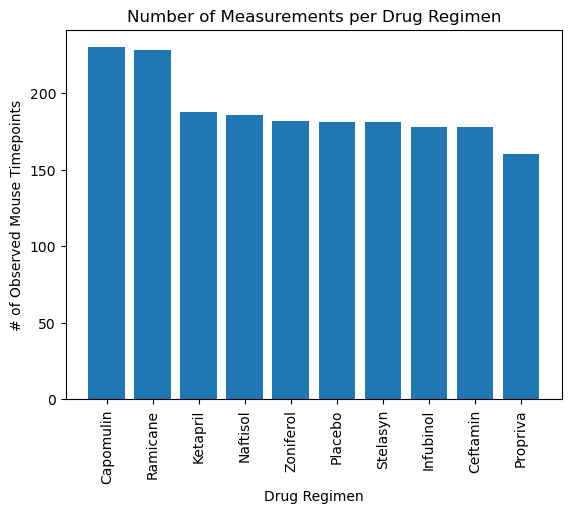

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(x=measurement_counts.index, height=measurement_counts.values)
# Setting the tittle and labels
plt.title('Number of Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotating the x-axis labels for better visual
plt.xticks(rotation=90)

# Displaying the chart
plt.show()


# Creating a pie chart using Pandas' DataFrame.plot() method
# 'kind='pie'' specifies a pie chart
# 'autopct' adds percentage labels inside each wedge
# 'startangle=0' rotates the pie chart so that female data is on the bottom
# 'colors' specifies the colors for each wedge

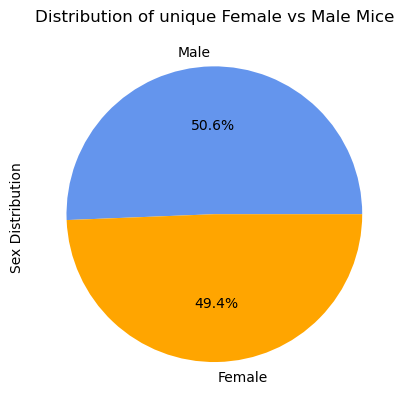

In [50]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Counting the number of female and male mice
sex_count = mouse_df['Sex'].value_counts()
pandas_pie_chart = sex_count.plot(kind='pie', autopct='%1.1f%%', 
                                         title='Distribution of unique Female vs Male Mice', 
                                         startangle=0, colors=['cornflowerblue', 'orange'], 
                                         ylabel='Sex Distribution ')

plt.show()


# Creating a pie chart using Matplotlib's pyplot methods
# 'plt.pie()' is used for creating a pie chart
# 'x' sets the sizes of the wedges
# 'labels' sets labels for each wedge
# 'autopct' adds percentage labels inside each wedge
# 'startangle=0' rotates the pie chart so that female data is on the bottom
# 'colors' specifies the colors for each wedge
# Adding a vertical label 'Sex' to the left of the pie chart
# The coordinates (-1.2, 0) position the label, 'va' vertically aligns it, and 'rotation' makes it vertical

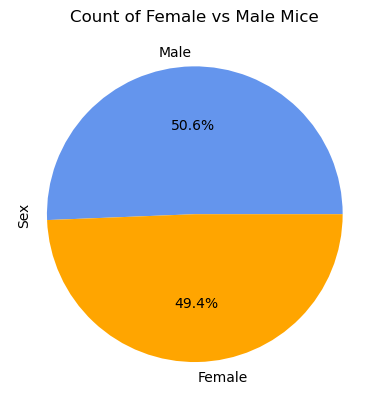

In [53]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

plt.pie(sex_count.values, labels=sex_count.index, autopct='%1.1f%%', 
        startangle=0, colors=['cornflowerblue', 'orange'])

# Setting the title for the pie chart
plt.title('Count of Female vs Male Mice')
plt.text(-1.2, 0, 'Sex', va='center', rotation='vertical')
plt.show()


## Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

final_volume = mouse_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume = pd.merge(mouse_df, final_volume, how = 'right', on = ['Mouse ID', 'Timepoint'])
final_volume


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [57]:
# Put treatments into a list for for loop
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
tumor_df = pd.DataFrame()

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset

for treatment in treatments_list:
    tumor_volume = final_volume.loc[final_volume['Drug Regimen'] == treatment, ['Drug Regimen','Tumor Volume (mm3)']]

    # Determine outliers using upper and lower bounds

    quartl_tumor_vol = tumor_volume['Tumor Volume (mm3)'].quantile([0.25,0.50,0.75])
    lower_quartl = quartl_tumor_vol[0.25]
    upper_quartl = quartl_tumor_vol[0.75]
    iqr = upper_quartl - lower_quartl
    lower_bound = lower_quartl - (1.5*iqr)
    upper_bound = upper_quartl + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume['Tumor Volume (mm3)']< lower_bound) |(tumor_volume["Tumor Volume (mm3)"]> upper_bound) ]
    print(f"{treatment}'s potential outliers: {outliers}")

    print(f'The median tumor volume is {quartl_tumor_vol[.5]} with the upper quartile at {upper_bound} and the lower quartile at {lower_bound}.')
   

Capomulin's potential outliers: Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []
The median tumor volume is 38.1251644 with the upper quartile at 51.83201549 and the lower quartile at 20.70456164999999.
Ramicane's potential outliers: Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []
The median tumor volume is 36.56165229 with the upper quartile at 54.30681135 and the lower quartile at 17.912664470000003.
Infubinol's potential outliers:    Drug Regimen  Tumor Volume (mm3)
31    Infubinol           36.321346
The median tumor volume is 60.16518046 with the upper quartile at 82.74144559000001 and the lower quartile at 36.83290494999999.
Ceftamin's potential outliers: Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []
The median tumor volume is 59.85195552 with the upper quartile at 87.66645829999999 and the lower quartile at 25.355449580000002.


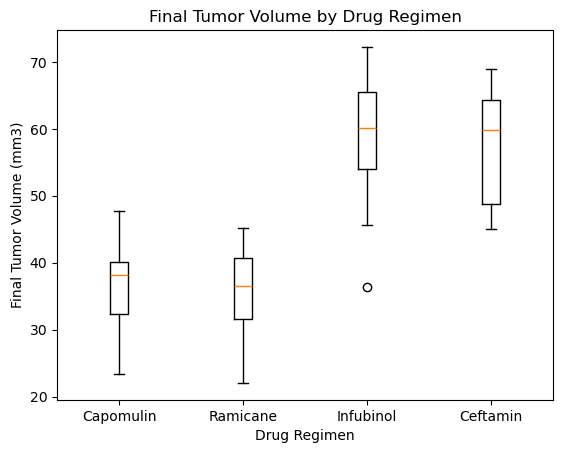

In [58]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
for treatment in treatments_list:
    data = final_volume[final_volume['Drug Regimen']== treatment]['Tumor Volume (mm3)']
    ax1.boxplot(data, positions = [treatments_list.index(treatment) + 1], tick_labels = [treatment])
    # flierprops=dict(markerfacecolor='r', marker='D'))
    ax1.set_ylabel('Final Tumor Volume (mm3)')
    ax1.set_xlabel('Drug Regimen')
    ax1.set_title('Final Tumor Volume by Drug Regimen')

# Display the box plot
plt.show()

## Line and Scatter Plots

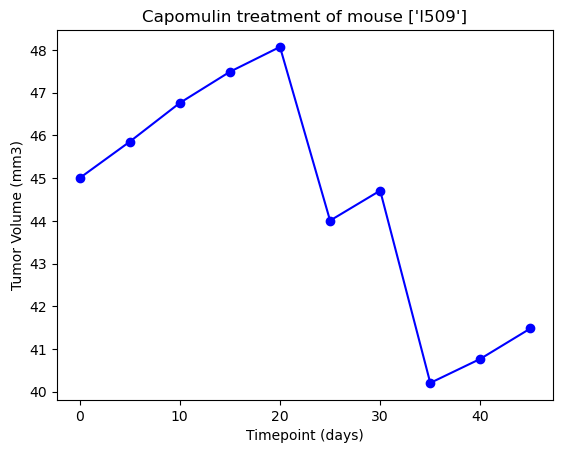

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter data for mice treated with Capomulin
capomulin_data = mouse_df[mouse_df['Drug Regimen'] == 'Capomulin']
one_mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == 'l509']
one_mouse_data.head()

# Selecting a specific mouse id.
# one_mouse_id == ('l509')
# one_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'one_mouse_id']  
# one_mouse_data.head()

# line plot of tumor volume vs. time point for mouse l509
plt.plot(one_mouse_data['Timepoint'], one_mouse_data['Tumor Volume (mm3)'], marker='o', color='b')  
plt.xlabel('Timepoint (days)')  
plt.ylabel('Tumor Volume (mm3)')  
plt.title(f"Capomulin treatment of mouse {one_mouse_id}")  
plt.show()  


In [60]:
one_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


In [61]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# selecting numeric columns for mean calculation
avg_mouse_weight = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})
print(avg_mouse_weight)


          Tumor Volume (mm3)  Weight (g)
Mouse ID                                
b128               41.963636        22.0
b742               40.083699        21.0
f966               36.505973        17.0
g288               41.990097        19.0
g316               44.613344        22.0
i557               44.805810        24.0
i738               39.141053        20.0
j119               44.465236        23.0
j246               43.216925        21.0
l509               44.434474        21.0
l897               42.507261        19.0
m601               34.847470        17.0
m957               39.049816        19.0
r157               45.798970        25.0
r554               36.509212        17.0
r944               43.367364        25.0
s185               34.559143        17.0
s710               42.803733        23.0
t565               39.328725        17.0
u364               39.887495        17.0
v923               41.581595        21.0
w150               41.384825        23.0
w914            

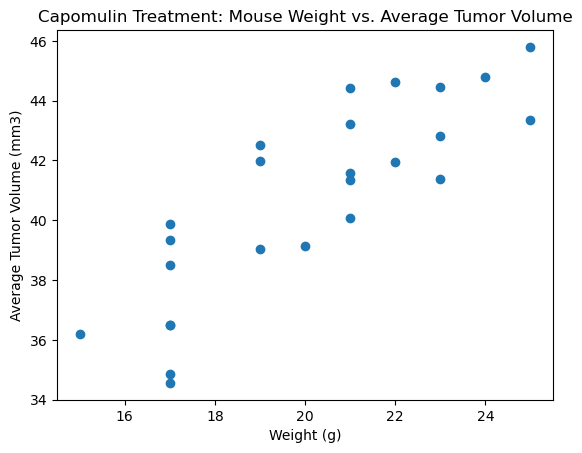

In [62]:
# Generate a scatter plot of mouse weight vs. average tumor volume
plt.scatter(avg_mouse_weight['Weight (g)'], avg_mouse_weight['Tumor Volume (mm3)'])

# # Adding labels and title to the scatter plot
plt.xlabel('Weight (g)')  
plt.ylabel('Average Tumor Volume (mm3)')  
plt.title('Capomulin Treatment: Mouse Weight vs. Average Tumor Volume')  

# Display the scatter plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.8419363424694721


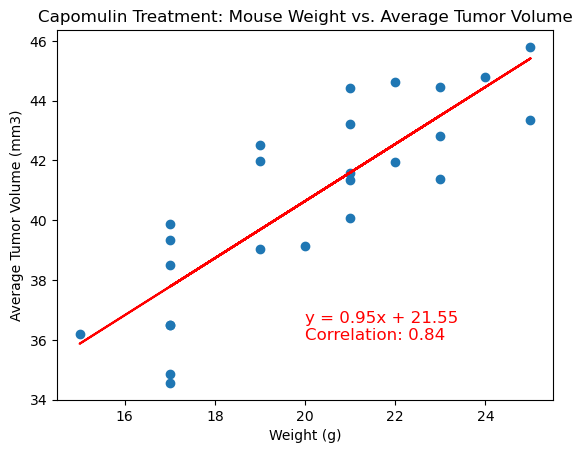

In [63]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import scipy.stats as st  # Importing for statistical calculations

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coeff = st.pearsonr(avg_mouse_weight['Weight (g)'], avg_mouse_weight['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and average tumor volume is {correlation_coeff}")

# Step 2: Perform linear regression analysis
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_mouse_weight['Weight (g)'], avg_mouse_weight['Tumor Volume (mm3)'])

# Step 3: Create equation of the line for the linear regression model
regress_values = avg_mouse_weight['Weight (g)'] * slope + intercept

# Step 4: Create scatter plot
plt.scatter(avg_mouse_weight['Weight (g)'], avg_mouse_weight['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Treatment: Mouse Weight vs. Average Tumor Volume')

# Step 5: Plot the linear regression model on top of the scatter plot
plt.plot(avg_mouse_weight['Weight (g)'], regress_values, "r-")

# Step 6: Display correlation coefficient and linear regression equation on the plot
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}\nCorrelation: {correlation_coeff:.2f}', 
             (20, 36), fontsize=12, color='red')

# Display the combined scatter plot and linear regression model
plt.show()
